**NBA Finals 2022 Public Sentiment Via Twitter**

*inspired by Ingried Chen https://deepnote.com/workspace/ingridchien-808582f2-246e-43c1-8f01-b7edcdc9cdd6/project/CovidVaccine-Sentiment-and-Trends-of-Worldwide-Vaccine-Tweets-69d5b63d-d232-4491-8850-712a7361114b/%2Fnotebook.ipynb*

The NBA Finals are currently underway, and have driven a lot of hype around the potential return to power of the Warriors dynasty versus a young, talented, and hungry Boston squad. 
Whether you are a fan of either team, or a fan of a team who is currently watching from Cancun, have you ever wondered how your opinion compares to that of others? 
Using textblob, we can better understand public sentiment on this ongoing series.        

Update: It is June 17th, 2022, and the Warriors have won the 2022 NBA Championship! Go Dubs!

**Import Libraries**

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

**Read, Clean, and Preview Our Data**

In [22]:
tweets = pd.read_csv('tweets/tweets.csv')
tweets.drop(columns='Unnamed: 0', inplace=True, axis=1)
print(tweets.columns, tweets.head(6))

Index(['Date', 'Location', 'User', 'Tweet'], dtype='object')                         Date Location             User  \
0  2022-06-05 22:16:47+00:00      NaN    RoseSportsPod   
1  2022-06-05 22:16:19+00:00      NaN      davemcswain   
2  2022-06-05 22:15:25+00:00      NaN      CCSports305   
3  2022-06-05 22:14:20+00:00      NaN      nickvaughn1   
4  2022-06-05 22:11:23+00:00      NaN  marcelinhofella   
5  2022-06-05 22:11:14+00:00      NaN       borocapper   

                                               Tweet  
0  Warriors Andre Iguodala is out for Game 2 vs. ...  
1  Draymond said golden state dominated the first...  
2  Warriors+Over (214 pts)\n$MCP305 &lt;---donate...  
3  If we win tonight issa wrap.. #AllAbout18  #Ce...  
4  Logo! Celtics! ☘️☘️💚💚💪💪💪🙏🙏🙌\n\n #NBAnaESPN #NB...  
5  Sunday \n#NBAFinals \nWarriors -4.5\n\nJordan ...  


Let's see how many tweets we have compiled in our dataset

In [23]:
tweets.shape

(1000, 4)

**Exploratory Analysis**

Let's also see when the most popular time to tweet is. The current dataset was scraped hours before game 2 of the NBA Finals, so my hypothesis is that right before/after/during the games will be when people tweet the most because they are in a very volatile and reactionary mood. 

Today is 6/5, so most tweets will be from 6/5. Another variable to take into account is if an event has just happened, your tweets may all be sorted by recent postings.

In [24]:
count = tweets.groupby('Date').size().to_frame().reset_index().rename(columns = {0:'count'})
most_frequent_times = count.sort_values(by='count', ascending=False).head(10)
most_frequent_times.head(20)

,Date,count
536,2022-06-05 07:20:37+00:00,3
537,2022-06-05 07:20:38+00:00,3
979,2022-06-05 22:04:15+00:00,2
511,2022-06-05 04:29:36+00:00,2
0,2022-06-03 17:26:18+00:00,1
663,2022-06-05 14:30:15+00:00,1
666,2022-06-05 14:36:57+00:00,1
665,2022-06-05 14:34:06+00:00,1
664,2022-06-05 14:33:10+00:00,1
661,2022-06-05 14:29:12+00:00,1


**Preparing Tweets for Analysis**

In [25]:
# initialize var for tweets column in df
Tweet = 'Tweet'

*prepare_tweets_for_sentiment_analysis* is a function that will prepare our dataframe into one that can be easily read and purposed for textblob. We will drop any empty tweets, and remove any non-alphanumeric characters which can limit the amount of 'bot' tweets that we encounter.

In [26]:
def prepare_tweets_for_sentiment_analysis(tweets):
    # dropping empty tweets (if any)
    tweets[Tweet] = tweets[Tweet].apply(lambda tweet: str(tweet)).dropna()
    # dropping characters not in A-Z, 0-9, (alphanumeric)
    punctuations = r'[^a-zA-Z0-9]'
    tweets[Tweet] = tweets[Tweet].apply(lambda tweet: re.sub(punctuations, " ", tweet))
    return tweets

In [27]:
prepare_tweets_for_sentiment_analysis(tweets)
tweets['Tweet'].head(6)

0    Warriors Andre Iguodala is out for Game 2 vs  ...
1    Draymond said golden state dominated the first...
2    Warriors Over  214 pts   MCP305  lt    donate ...
3    If we win tonight issa wrap    AllAbout18   Ce...
4    Logo  Celtics                  NBAnaESPN  NBAF...
5    Sunday   NBAFinals  Warriors  4 5  Jordan Pool...
Name: Tweet, dtype: object

**Sentiment Analysis**

I would like to thank Ingrid Chien for her similar project linked at the top. If it was not for her work, I would not have been exposed to TextBlob (at least I do not think I would have until I took an NLP class of some sort).

To conduct sentiment analysis, we will use .polarity() to assign polarity scores to each tweet. Then we will visualize the overall polarity of the dataset. This will help us determine if fans are generally positively or negatively reacting to the NBA Finals.

If we wanted to conduct sentiment analysis for each team, say on the winner and/or loser of that night, we could scrape another dataset that only includes tweets related to one team. This would mean just changing the query to exclude whichever team we would not focus on. 

**Negative Sentiment**

*'Negative'* words, their frequency, and lack of *'positive'* words will influence polarity:

In [28]:
# negative sentiment represented by negative score
negative = TextBlob('Klay thompson is so bad bro. How do you shoot 4/19 as a splash brother?!!!').sentiment.polarity
negative

-1.0

**Positive Sentiment**

Vice versa for opposite case:

In [29]:
# Positive sentiment represented by positive score
positive = TextBlob('The Celtics are not shooting like that again. I have faith in our warriors that they will win the next 3 games!').sentiment.polarity
positive

0.4

**Compiling Sentiment**

As an example we can write a function that will append sentiments to an array and then compute statistical analysis for it using numpy. 

In [30]:
import numpy as np

In [62]:
# general defined functions
def textBlob(tweets):
    tweets['Score'] = tweets['Tweet'].apply(lambda x:TextBlob(x).sentiment.polarity).values
    return print(tweets)

def compile_sentiment(tweets):
    mean_sentiment = np.mean(tweets['Score'])
    std_sentiment = np.std(tweets['Score'])
    sample_sentiment = (mean_sentiment, std_sentiment)
    print('Mean, Standard Deviation:')
    return mean_sentiment, std_sentiment

In [65]:
# hardcoded input for our specific example
sample_texts = pd.DataFrame(['The Celtics are not shooting like that again. I have faith in our warriors that they will win the next 3 games!', 
    'Celtics are horrible', 
    'Celtics got destroyed by Kobe',
    'Celtics going to lose again',
    'Warriors going to win this year!',
    'Golden state is so much better',
    'Steph curry is the best shooter, they will win',
    'Klay thompson is in a shooting slump. He will not recover'
    ])
sample_texts.rename(columns={0:'Tweet'}, inplace=True)
sample_texts.head(3)

,Tweet
0,The Celtics are not shooting like that again. ...
1,Celtics are horrible
2,Celtics got destroyed by Kobe


In [66]:
textBlob(sample_texts)
print('\n')
compile_sentiment(sample_texts)

                                               Tweet  Score
0  The Celtics are not shooting like that again. ...    0.4
1                               Celtics are horrible   -1.0
2                      Celtics got destroyed by Kobe    0.0
3                        Celtics going to lose again    0.0
4                   Warriors going to win this year!    1.0
5                     Golden state is so much better    0.4
6     Steph curry is the best shooter, they will win    0.9
7  Klay thompson is in a shooting slump. He will ...    0.0


Mean, Standard Deviation:


(0.21249999999999997, 0.5882973312875046)

**We will now perform this action on our actual dataset**

In [67]:
textBlob(tweets)
print('\n')
compile_sentiment(tweets)

                          Date Location             User  \
0    2022-06-05 22:16:47+00:00      NaN    RoseSportsPod   
1    2022-06-05 22:16:19+00:00      NaN      davemcswain   
2    2022-06-05 22:15:25+00:00      NaN      CCSports305   
3    2022-06-05 22:14:20+00:00      NaN      nickvaughn1   
4    2022-06-05 22:11:23+00:00      NaN  marcelinhofella   
..                         ...      ...              ...   
995  2022-06-03 17:32:54+00:00      NaN     FOE5frmdaRAQ   
996  2022-06-03 17:29:48+00:00      NaN      PCwarrior69   
997  2022-06-03 17:28:41+00:00      NaN    thejoelwright   
998  2022-06-03 17:27:36+00:00      NaN     TheRocketGuy   
999  2022-06-03 17:26:18+00:00      NaN     PeteyWeeStro   

                                                 Tweet     Score  
0    Warriors Andre Iguodala is out for Game 2 vs  ... -0.400000  
1    Draymond said golden state dominated the first...  0.158889  
2    Warriors Over  214 pts   MCP305  lt    donate ...  0.000000  
3    If we 

(0.06898933577225244, 0.3126198340932978)

Text(0.5, 1.0, 'Distribution of Tweet Polarity')

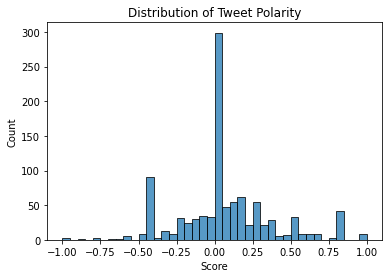

In [76]:
sns.histplot(data=tweets, x = 'Score')
plt.title('Distribution of Tweet Polarity')

/home/nateackerman/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

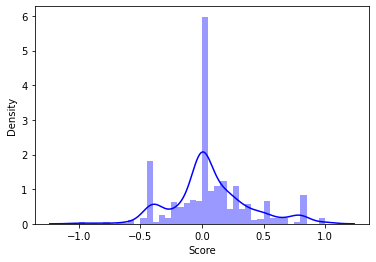

In [84]:
sns.distplot(tweets['Score'], color='b')

As we can see, about 30% of ouur tweets tend to be neutral in polarity, meaning they are neither very positive or very negative. In addition, the distribution is centered at 0; if our bell curve was shifted right or left, we would be able to conclude that there was some polarity in the tweets collected. However based on our tweets dataset, there are no significant findings that suggest NBA fans are biased extremely positively or negatively towards this NBA Finals

**Considering the Warriors have just won the NBA Championship yesterday, a continuation of this project would be to scrape more tweets from 6/16 - 6/21 (day after Warriors Parade) to see if NBA fans are significantly positive/negative towards this result**